# Livadă
![Tarla](https://paperopera.files.wordpress.com/2014/08/9-romania-hillside.jpg "Tarla")
## Problem statement
We are considering to start our own orchard which we want to collect fruits from and sell it via a website to people looking for organic fruits. To make sure we are not wasting time and money we  first simulate the situation that we expect to have. This is our start phase of which we are curious about how much fruits we can collect. For this we wrote a script which can draw our orchard based on L-Systems and monitor how much fruits we can collect from it.
## Programming approach
Knowing that we will have multiple trees with the same property set we will first set-up a class containing the data relevant to a tree (ranging from name to age, and from age to amount of fruits that it has produced). This class will take the tasks to generate the L-system, reset the position of the Turtle and draw the tree according to the L-system commands.
## Dataset
To determine what kind of trees we will be growing we need to determine the according L-systems of certain trees. Because L-systems are not directly connected to a certain tree we will let our imagination do the work there.
## Logging of data
To determine performance of certain we need to log data from the trees. The dataset that is chosen to log is: `[category, name, age, branches_count, leaves_count, fruits_count]` which are not cumilative, but per year.
## Plotting of data
To prevent having to dig into the dataset we want to visualize our dataset.
The following plots are relevant:
- Fruits per tree per year
- Fruits per tree category per year

## Notes
- The fruits do not only grow at the end of the branches, especially considering the trees grow every year, the end of the branch of the previous year will not be the end of it in the next year, but there will still be branches growing there. Also there needs to be a leaf at a branch in order to grow a fruit at that point.
- An option would be to ask the user the inputs (axiom, leaf_length and so on) via the input() function, but because this would be too much work for a lot of trees that is not implemented.
- Data structure of class arguments:
    - number
    - category
    - name
    - start_x
    - start_y
    - start_direction
    - branch_length
    - leaf_length
    - fruit_size
    - angle
    - axiom
    - fruit_from
    - fruit_prob
    - fruit_color

## Extra features
- User can define branch length, leaf size and fruit size
- Trees are colored
- Fruits/Leaves/Branches can be distinguished from each other
- Data about trees is shown in the drawing
- Probability for a fruit can be given (between 0 and 1)
- Randomized locations are used
- Automated planting is possible by giving how many trees of which kind you want to plant
- Probability for growing a tree is given
     - Total grown trees of planted seeds is given
- Showing how far the program is with drawing the trees


And probably some more things which we aren't aware of because we really liked it :)

## Small example orchard
![Example](https://i.imgur.com/A6KhMk0.png)

## Loading dependencies

In [1]:
from turtle import Turtle, Screen
import turtle
import random
import matplotlib.pyplot as plt
import pandas as pd

## Setting up class
More info about L-Systems: https://www.youtube.com/watch?v=f6ra024-ASY

In [2]:
class turtleControl(object):
    def __init__(self, number, category, name, start_x, start_y, start_direction, branch_length, leaf_length, fruit_size, angle, axiom, fruit_from, fruit_prob, fruit_color):
         # Create the turtle object and set it at the right position
        turtles.append(Turtle())
        
        # Set initial position/direction
        self.start_x = start_x
        self.start_y = start_y
        self.direction = start_direction
        
        # Set name, category and number
        self.name = name
        self.category = category
        self.number = number
        
        # Set the fruit properties
        self.fruit_from = fruit_from
        self.fruit_prob = fruit_prob
        
        # Start a initial year and give it an age of 0
        self.newyear()
        self.age = 0
        
        # Set drawing parameters
        self.branch_length = branch_length
        self.leaf_length = leaf_length
        self.fruit_size = fruit_size
        self.fruit_color = fruit_color
        self.angle = angle
        self.axiom = axiom
        
    # Iterate in a new year
    def newyear(self):

        # Reset location of Turtle
        turtles[self.number].hideturtle()
        turtles[self.number].penup()
        turtles[self.number].setx(self.start_x)
        turtles[self.number].sety(self.start_y)
        turtles[self.number].setheading(self.direction)
        turtles[self.number].speed("fastest")
        turtles[self.number].penup()
        
    # Create the L-System chain
    def getfinalrule(self):
        
        # Use L-System theory to extend the axiom according to the rules
        for rule in rules[self.number]:
            extended_rule = [self.axiom]
            for _ in range(self.age):
                temp_s = []
                for char in extended_rule[-1]:
                    if char in rules[self.number]:
                        temp_s.append(rules[self.number][char][-1])
                    else:
                        temp_s.append(char)
                
                extended_rule.append(''.join(temp_s))
                
        # Return latest L-system rulechain
        return extended_rule[-1]
        
    def draw(self):
        
        # Draw the tree according to the ruleset that is returned from getfinalrule(self)
        self.counts = [0,0,0] # branches, leaves, fruits
        self.stack = []
        rule = self.getfinalrule()
        
        # Loop through the chars in the rule variable
        for command in rule:
            turtles[self.number].pd()
            if command == "B":
                turtles[self.number].pensize(3)
                turtles[self.number].color("brown")
                turtles[self.number].forward(self.branch_length)
                self.counts[0] += 1
            elif command == "L":
                turtles[self.number].pensize(6)
                turtles[self.number].color("green")
                turtles[self.number].forward(self.leaf_length)
                self.counts[1] += 1
            elif command == "F":
                if(self.age>=self.fruit_from):
                    if random.random() <= self.fruit_prob:
                        turtles[self.number].pensize(8)
                        turtles[self.number].color(self.fruit_color)
                        turtles[self.number].forward(self.fruit_size)
                        self.counts[2] += 1
            elif command == "+":
                turtles[self.number].right(self.angle)
            elif command == "-":
                turtles[self.number].left(self.angle)
            elif command == "[":
                self.stack.append((turtles[self.number].position(), turtles[self.number].heading()))
            elif command == "]":
                turtles[self.number].pu()  # pen up - not drawing
                position, heading = self.stack.pop()
                turtles[self.number].goto(position)
                turtles[self.number].setheading(heading)
        
        # Add a year to the age
        self.age += 1
        
        # Add the log data to the dataframe
        log_data.loc[len(log_data)] = [self.category, self.name, self.age, self.counts[0], self.counts[1], self.counts[2]]

## Setting up data

In [3]:
# Make a log dataFrame
column_names = ["Category","Name","Year","Branches","Leaves","Fruits"]
log_data = pd.DataFrame(columns = column_names)

# Initiate the lists where the turtle classes and turtles will be stored
turtle_classes = []
turtles = []

## Define the parameters of the trees
More info about L-Systems: http://algorithmicbotany.org/papers/abop/abop.pdf# 

In [4]:
# Define amount of years that need to be simulated, the time needed for drawing increases exponentially
years = 3

# Define the amount of seeds that you want to plant and what the chance is that the seed will produce a tree (chance given in range 0.0-1.0)
apple_seeds = 1
apple_chance = 0.5

pear_seeds = 1
pear_chance = 0.7

plum_seeds = 1
plum_chance = 1

hazelnut_seeds = 1
hazelnut_chance = 1

# Count the trees to now how much place has to be reserved in the rules array
amount_trees = apple_seeds + pear_seeds + plum_seeds + hazelnut_seeds

# Define L-System variables
rules = [{} for _ in range(amount_trees)]


# Class constructor arguments are: number, category, name, start_x, start_y, start_direction, branch_length, leaf_length, fruit_size, angle, axiom, fruit_from, fruit_prob, fruit_color
## Loop through all the trees
i = 0
k = 0
for j in range(apple_seeds):
    # Check if the seed results in a tree
    if (random.random()<=apple_chance):
        # Append tree object to turtle_classes
        turtle_classes.append(turtleControl(i,"Fruit tree", ("Apple "+str(k+1)), random.randint(-800,800), random.randint(-300,40),90,15,3,5,30,"BB",1,0.8, "red"))
        # Define its rules
        rules[i]["B"] = ["B[+BL][-BL]"]
        rules[i]["L"] = ["F"]
        # Increase i and k to indicate a tree has grown
        i += 1
        k += 1
    
k = 0
for j in range(pear_seeds):
    if (random.random()<=pear_chance):
        turtle_classes.append(turtleControl(i,"Fruit tree", ("Pear "+str(k+1)), random.randint(-800,800), random.randint(-300,40),90,20,1,4,22.5,"BL",1,0.9,"#C3D938"))
        rules[i]["B"] = ["B[+B+BL][-B-BL]"]
        rules[i]["L"] = ["F"]
        i += 1
        k += 1

k = 0
for j in range(plum_seeds):
    if (random.random()<=plum_chance):
        turtle_classes.append(turtleControl(i,"Fruit tree", ("Plum "+str(k+1)), random.randint(-800,800), random.randint(-300,40),90,20,1,4,22.5,"BBB",1,0.9, "#8e4585"))
        rules[i]["B"] = ["B[+B-BL][-B+BL]"]
        rules[i]["L"] = ["F"]
        i += 1
        k += 1

k = 0
for j in range(hazelnut_seeds):
    if (random.random()<=hazelnut_chance):
        turtle_classes.append(turtleControl(i,"Nut tree", ("Hazelnut "+str(k+1)), random.randint(-800,800), random.randint(-300,40),90,20,1,4,22.5,"BL",1,0.9,"#7b3f00"))
        rules[i]["B"] = ["B[-B-B+BL][+B+B-BL]"]
        rules[i]["L"] = ["F"]
        i += 1
        k += 1
        
        
print("Of the %i seeds planted, %i trees have grown" % (amount_trees, i+1))

Of the 4 seeds planted, 4 trees have grown


## Start the program with labels

In [5]:
# Start the program
window = turtle.Screen()
window.screensize(1000, 1000)
window.setup(width=1.0, height=1.0, startx=None, starty=None)

# Go through all objects and write the names according to their position
for i in range(len(turtle_classes)):
    turtle.hideturtle()
    turtle.penup()
    turtle.setx(turtle_classes[i].start_x-40)
    turtle.sety(turtle_classes[i].start_y-30)
    turtle.write(turtle_classes[i].name)

## Iterate through the years and draw the trees

In [6]:
%%time
# Record time (for fun :))


# Go through x amount of years (j) and then go through every tree and draw it
for j in range(years):
    print("Year %i/%i" % (j+1,years))
    for i in range(len(turtle_classes)):
        
        # Call the function to draw the L-system chain
        turtle_classes[i].draw()
        
        # Call newyear function to make sure the turtle goes back to its initial position
        turtle_classes[i].newyear()
        
        # Write the counts of the tree
        turtle.setx(turtle_classes[i].start_x-40)
        turtle.sety(turtle_classes[i].start_y-40-10*j)
        year = str(j + 1)
        turtle.write("Year "+year+":"+str(turtle_classes[i].counts))
        
        # Show state for long drawing process insight
        print("-- Drawing tree %i/%i" % (i+1,len(turtle_classes)))


Year 1/3
-- Drawing tree 1/3
-- Drawing tree 2/3
-- Drawing tree 3/3
Year 2/3
-- Drawing tree 1/3
-- Drawing tree 2/3
-- Drawing tree 3/3
Year 3/3
-- Drawing tree 1/3
-- Drawing tree 2/3
-- Drawing tree 3/3
Wall time: 27.4 s


## Show results

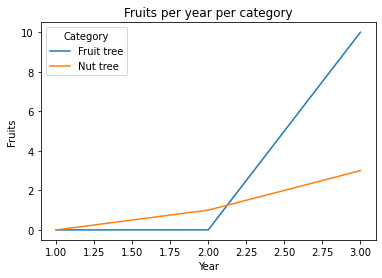

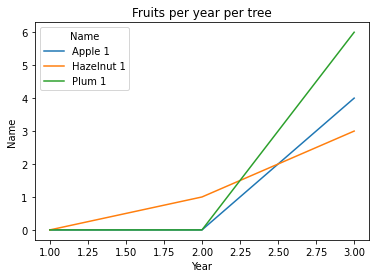

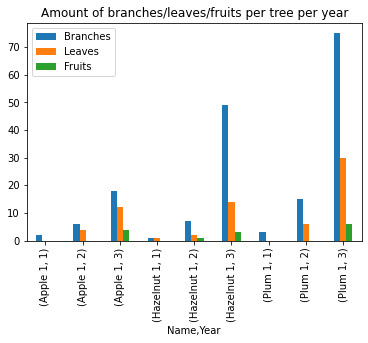

     Category        Name Year Branches Leaves Fruits
0  Fruit tree     Apple 1    1        2      0      0
1  Fruit tree      Plum 1    1        3      0      0
2    Nut tree  Hazelnut 1    1        1      1      0
3  Fruit tree     Apple 1    2        6      4      0
4  Fruit tree      Plum 1    2       15      6      0
5    Nut tree  Hazelnut 1    2        7      2      1
6  Fruit tree     Apple 1    3       18     12      4
7  Fruit tree      Plum 1    3       75     30      6
8    Nut tree  Hazelnut 1    3       49     14      3


In [7]:
# Group data per category, sum it and plot the data
(log_data.groupby(['Category', 'Year'])['Fruits']
   .sum()
   .unstack('Category', fill_value=0)
   .plot())
plt.xlabel("Year")
plt.ylabel("Fruits")
plt.title("Fruits per year per category")
plt.show()

# Group data per name, sum it and plot the data
(log_data.groupby(['Name', 'Year'])['Fruits']
   .sum()
   .unstack('Name', fill_value=0)
   .plot())
plt.xlabel("Year")
plt.ylabel("Name")
plt.title("Fruits per year per tree")

# Group data per name, sum it and plot the data
log_data.groupby(['Name','Year']).sum().plot.bar()
plt.title("Amount of branches/leaves/fruits per tree per year")

plt.show()


print(log_data)

In [8]:
# This command makes sure the turtle screen doesn't freeze
turtle.done()